# Ejercicio de reconocimiento Facial con SVM

In [1]:
from sklearn.datasets import fetch_lfw_people

In [2]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [3]:
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


In [6]:
import matplotlib.pyplot as plt

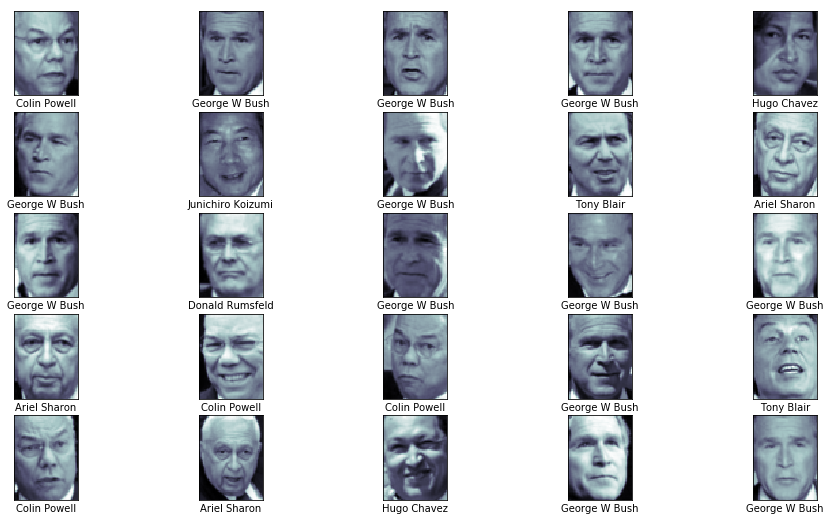

In [10]:
fig, ax = plt.subplots(5, 5, figsize=(16,9))
for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(faces.images[i], cmap='bone')
    ax_i.set(xticks=[], yticks=[], xlabel=faces.target_names[ faces.target[i] ])

In [12]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

In [13]:
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [16]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [17]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(faces.data, faces.target, random_state=42)

In [18]:
param_grid = {
    "svc__C":[0.1,1,5,10,50],
    "svc__gamma":[0.0001, 0.0005, 0.001, 0.005, 0.01]
}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, Ytrain)

/home/lautaro/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


CPU times: user 1min 23s, sys: 149 ms, total: 1min 23s
Wall time: 43.6 s


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=150, random_state=42,
  svd_solver='auto', tol=0.0, whiten=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'svc__C': [0.1, 1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [19]:
print(grid.best_params_)

{'svc__C': 10, 'svc__gamma': 0.001}


In [20]:
classfier = grid.best_estimator_
ypred = classfier.predict(Xtest)

Text(0.5, 0.98, 'predicciones de las imagenes')

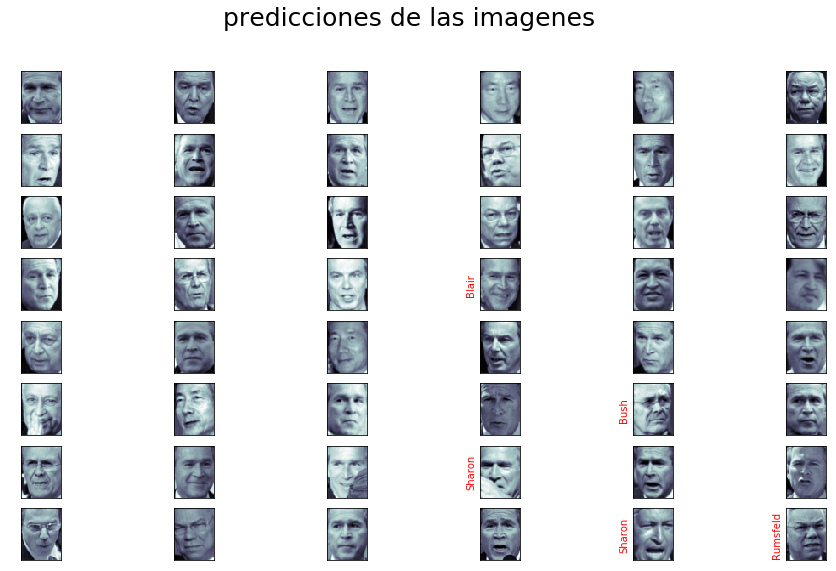

In [30]:
fig, ax = plt.subplots(8, 6, figsize=(16,9))
for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(Xtest[i].reshape(62,47), cmap='bone')
    ax_i.set(xticks=[], yticks=[])
    ax_i.set_ylabel(faces.target_names[ ypred[i]].split()[-1] ,
                   color='white' if ypred[i]==Ytest[i] else 'red')
fig.suptitle('predicciones de las imagenes', size=25)

In [31]:
from sklearn.metrics import classification_report

In [32]:
print( classification_report(Ytest, ypred, target_names=faces.target_names) )

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

        micro avg       0.85      0.85      0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
mat = confusion_matrix(Ytest, ypred)

In [35]:
import seaborn as sns; sns.set()

/home/lautaro/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/lautaro/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/lautaro/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


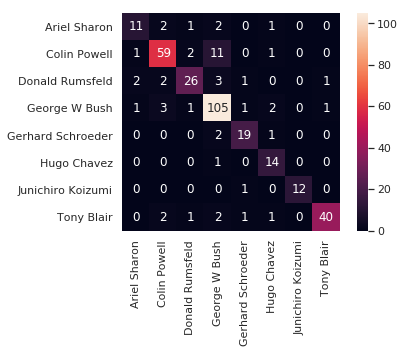

In [37]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            xticklabels=faces.target_names, yticklabels=faces.target_names)